<a href="https://colab.research.google.com/github/vchandraiitk/PokerCardGame/blob/master/Vikas_Q11_Module_8_Business_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the dataset

In [ ]:
!wget -qq https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv

### Read CSV data in dataframe

In [ ]:
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
car_sales = pd.read_csv("monthly-car-sales.csv")
car_sales.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


## Now answer the following: [5 X 10]

### Question A. Plot the time series and comment on the trend and seasonality.

<Axes: xlabel='Month'>

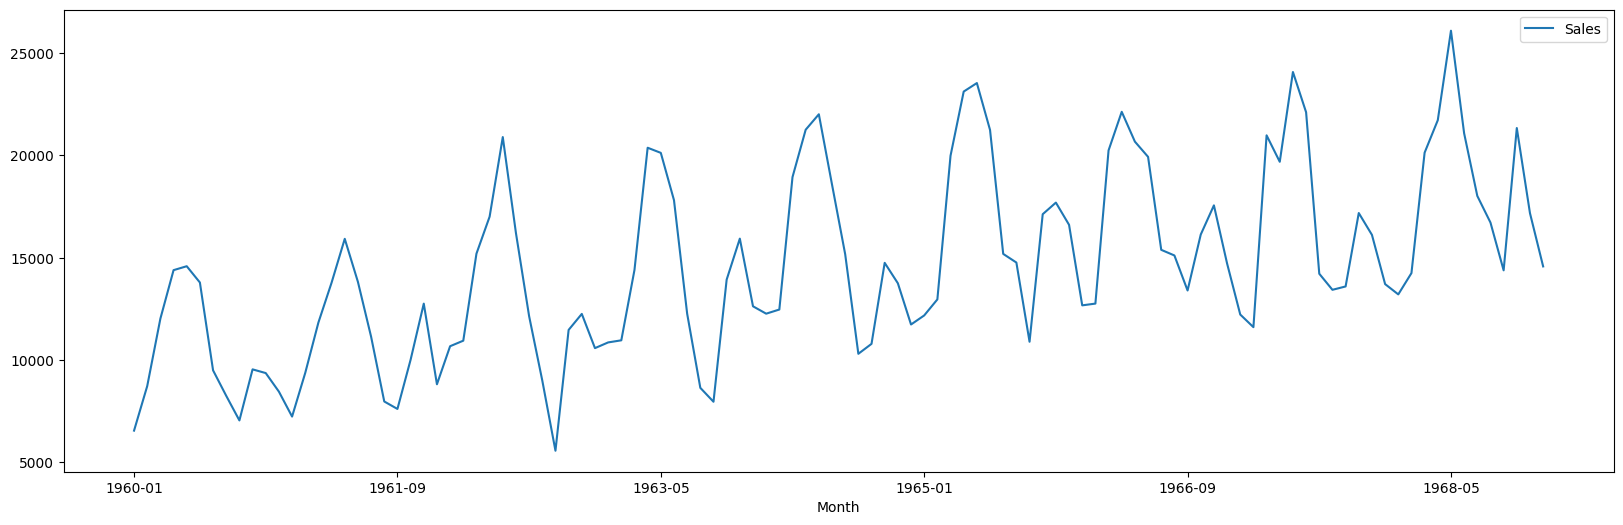

In [ ]:
car_sales.set_index('Month', inplace=True)
car_sales.plot(figsize=(20, 6))

## Answer-A
### Trend
*   There's a upward trend from 1960 to 1968.

*   Sales increasing over time, despite some short-term drops.

*   This indicates long-term growth in sales over the years.

### Seasonality
*   Data has strong seasonality.
*   It has seasonal behavior year over year and that could be due to Holidays or special events

### Question B. Determine the stationarity of the time series using a suitable test.

In [ ]:
# Determine the stationarity of the time series using a suitable test.


def stationarity(time_series):
    returnFlag = False
    # Perform Dickey-Fuller test
    result = adfuller(time_series)
    return result[0], result[1]

adf_statistic, p_value =  stationarity(car_sales["Sales"])
print(f"ADF Statistic: {round(adf_statistic,2)}")
print(f"p-value: {round(p_value,2)}")


ADF Statistic: -1.22
p-value: 0.66


## Answer-B
p-value is > 0.05 that means we can't reject null hypothesis. So the **time series is Non-Stationary**

###  Question C. Make the series stationary by using log transformation and/or appropriate differencing. Then test if the time series is stationary using a suitable test.


In [ ]:
#Make the series stationary by using log transformation and/or appropriate differencing. Then test if the time series is stationary using a suitable test.
car_sales_log = np.log(car_sales)
car_sales_log.head()

,Sales
Month,
1960-01,8.787220
1960-02,9.074292
1960-03,9.394826
1960-04,9.574636
1960-05,9.587886


In [ ]:
def stationarity(time_series):
    returnFlag = False
    # Perform Dickey-Fuller test
    result = adfuller(time_series)
    return result[0], result[1]

adf_statistic, p_value =  stationarity(car_sales_log["Sales"])
print(f"ADF Statistic: {round(adf_statistic,2)}")
print(f"p-value: {round(p_value,2)}")

ADF Statistic: -1.45
p-value: 0.56


In [ ]:
#Make the series stationary by using log transformation and/or appropriate differencing. Then test if the time series is stationary using a suitable test.
car_sales_diff = car_sales.diff()
car_sales_diff.dropna(inplace=True)
car_sales_diff.head()

,Sales
Month,
1960-02,2178.0
1960-03,3298.0
1960-04,2369.0
1960-05,192.0
1960-06,-796.0


In [ ]:
def stationarity(time_series):
    returnFlag = False
    # Perform Dickey-Fuller test
    result = adfuller(time_series)
    return result[0], result[1]

adf_statistic, p_value =  stationarity(car_sales_diff["Sales"])
print(f"ADF Statistic: {round(adf_statistic,2)}")
print(f"p-value: {round(p_value,2)}")

ADF Statistic: -6.2
p-value: 0.0


## Answer-C
With the differencing we can see that p-value is ~0 that means time series stationary.

Also Log transformation didn't help as the trend was linear, but differencing made the series stationary

### Question D. Plot the ACF and PACF of the time series. Do you observe seasonality? If yes, at what lag? Use it as the ‘s’ value in sub-question e below.


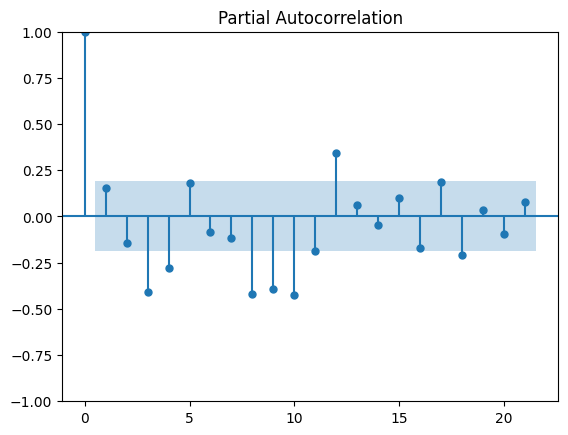

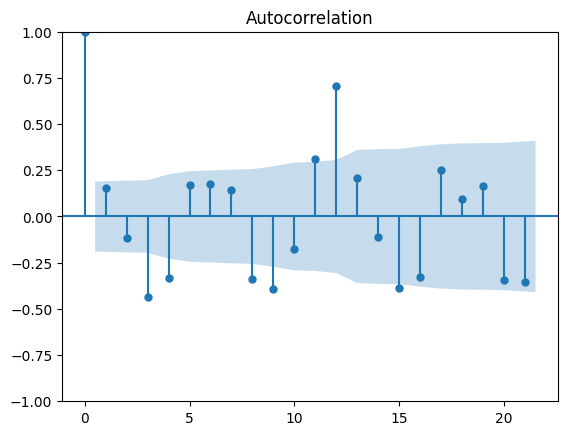

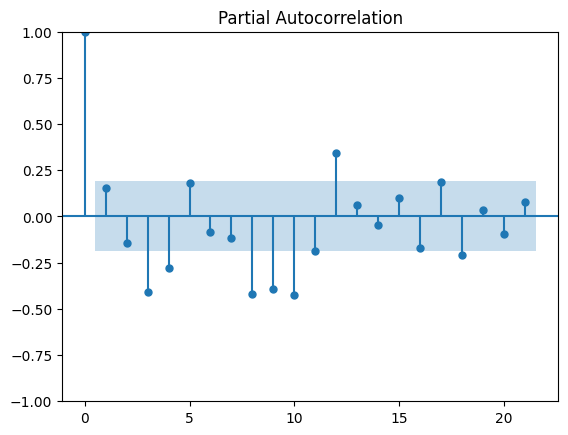

In [ ]:
#Plot the ACF and PACF of the time series. Do you observe seasonality? If yes, at what lag? Use it as the ‘s’ value in sub-question e below.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(car_sales_diff["Sales"])
plot_pacf(car_sales_diff["Sales"])


## Answer-D
Yes, seasonality is present in the time series.

From the ACF plot, we can see a significant spike at lag 12. This suggests annual seasonality, may be because the data is monthly.
**seasonality parameter s=12**

## Question-E
Using the function

sm.tsa.statespace.SARIMAX(log_car_sales, order=(p,d,q), seasonal_order=(P,D,Q,s))

try the following models with appropriate values of d, D and s:

       i. p=2, q=0, P=2, Q=0
       ii. p=2, q=1, P=2, Q=1
       iii. p=2,q=2,P=2,Q=2

Which amongst the (i), (ii), and (iii) will you pick, Why?

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def sarimax_model(log_car_sales,order,seasonal_order):
    model = SARIMAX(log_car_sales,order=order,seasonal_order=seasonal_order)
    model_fit = model.fit()
    return model_fit

In [ ]:
# Option 1: p=2, q=0, P=2, Q=0, d=1, D=1, s=12
order = (2, 1, 0)
seasonal_order = (2, 1, 0, 12)
model_fit1 = sarimax_model(car_sales["Sales"], order, seasonal_order)
print(model_fit1.summary())

# Option 2: p=2, q=1, P=2, Q=1, d=1, D=1, s=12
order = (2, 1, 1)
seasonal_order = (2, 1, 1, 12)
model_fit2 = sarimax_model(car_sales["Sales"], order, seasonal_order)
print(model_fit2.summary())

# Option 3: p=2, q=2, P=2, Q=2, d=1, D=1, s=12
order = (2, 1, 2)
seasonal_order = (2, 1, 2, 12)
model_fit3 = sarimax_model(car_sales["Sales"], order, seasonal_order)
print(model_fit3.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -842.935
Date:                            Tue, 08 Apr 2025   AIC                           1695.871
Time:                                    07:31:35   BIC                           1708.640
Sample:                                01-01-1960   HQIC                          1701.031
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5575      0.113     -4.953      0.000      -0.778      -0.337
ar.L2         -0.2364      0.127   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -835.155
Date:                            Tue, 08 Apr 2025   AIC                           1684.310
Time:                                    07:31:51   BIC                           1702.187
Sample:                                01-01-1960   HQIC                          1691.533
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2160      0.117      1.845      0.065      -0.013       0.445
ar.L2          0.1006      0.131   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible sta

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -837.163
Date:                            Tue, 08 Apr 2025   AIC                           1692.325
Time:                                    07:32:00   BIC                           1715.310
Sample:                                01-01-1960   HQIC                          1701.613
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7802      0.789      0.989      0.323      -0.767       2.327
ar.L2         -0.0014      0.293   

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Answer-E
We will go with Model 2 with **Option 2: p=2, q=1, P=2, Q=1, d=1, D=1, s=12**

**Select Model-2** with options (2,1,1)(2,1,1,12) as it has the **lowest AIC (1684.31)**, converges cleanly, and includes both AR and MA terms to capture short-term and seasonal dependencies effectively. Its residuals show no significant autocorrelation, indicating a good fit without overfitting.

**Model-1 can be selected** with options (2,1,0)(2,1,0,12) if you need better peformance but it has slightly higher AIC and poorer fit
